In [1]:
## Charge les donénes traitées à partir des TD1 & TD2
setwd("../Data")
load("MFData_mois.RData")
load("DriasData_mois.RData")

In [2]:
## Charge la librairie spatstat qui va nous permettre de faire l'appariement 
## entre mes stations MF vs point de grille Drias du modèle climatique le plus proche
library(spatstat)

Le chargement a nécessité le package : spatstat.data

Le chargement a nécessité le package : spatstat.univar

spatstat.univar 3.0-1

Le chargement a nécessité le package : spatstat.geom

spatstat.geom 3.3-3

Le chargement a nécessité le package : spatstat.random

spatstat.random 3.3-2

Le chargement a nécessité le package : spatstat.explore

Le chargement a nécessité le package : nlme

spatstat.explore 3.3-2

Le chargement a nécessité le package : spatstat.model

Le chargement a nécessité le package : rpart

spatstat.model 3.3-2

Le chargement a nécessité le package : spatstat.linnet

spatstat.linnet 3.2-2


spatstat 3.2-1 
For an introduction to spatstat, type ‘beginner’ 




In [5]:
## Création d'objets spatiaux ppp pour les stations MF & pour les points de grille Drias

MFstn.ppp <- ppp(x=MFTnposte$LON, y=MFTnposte$LAT,
                 window=owin(c(min(MFTnposte$LON),max(MFTnposte$LON)),
                             c(min(MFTnposte$LAT),max(MFTnposte$LAT))))

MFstx.ppp <- ppp(
  x = MFTxposte$LON, y = MFTxposte$LAT,
  window = owin(
    c(min(MFTxposte$LON), max(MFTxposte$LON)),
    c(min(MFTxposte$LAT), max(MFTxposte$LAT))
  )
)

MFstrr.ppp <- ppp(
  x = MFRRposte$LON, y = MFRRposte$LAT,
  window = owin(
    c(min(MFRRposte$LON), max(MFRRposte$LON)),
    c(min(MFRRposte$LAT), max(MFRRposte$LAT))
  )
)

drias.ppp <- ppp(mydrias.pts$lon,mydrias.pts$lat,
                 c(min(mydrias.pts$lon),max(mydrias.pts$lon)),
                 c(min(mydrias.pts$lat),max(mydrias.pts$lat)))

########################################################################################

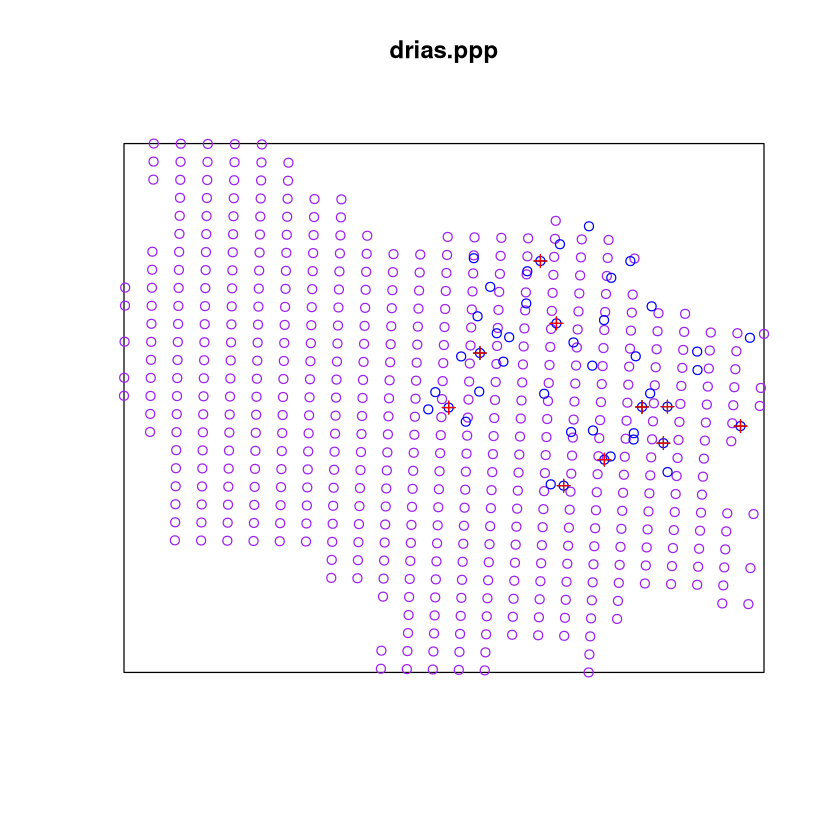

In [6]:
## Trace la carte des stations et des points de grille
plot(drias.ppp, cols = "purple")
plot(MFstrr.ppp, cols = "blue", add = TRUE)
plot(MFstn.ppp, pch=3, add = TRUE)
plot(MFstx.ppp, pch=3,  cols = "red", add = TRUE)

In [8]:
###########################################################################################

## Cherche le point de grille Drias plus proche voisin (nearest neighbour) de chaque station MF
ind <- nncross(MFstn.ppp,drias.ppp)$which
ind

[1] 250 363 446 271 272 157 224 263 200 337

In [9]:
## récupération des points de grille Drias concernés
driasTn.MF <- resuTn[ind,]
dim(driasTn.MF)

[1] 10 12

In [10]:
## transforme les données en vecteur pour la comparaison
driastn <- as.vector(driasTn.MF)
MFtn <- as.vector(resuMFTn)


Call:
lm(formula = driastn ~ MFtn)

Coefficients:
(Intercept)         MFtn  
      1.181        1.136  


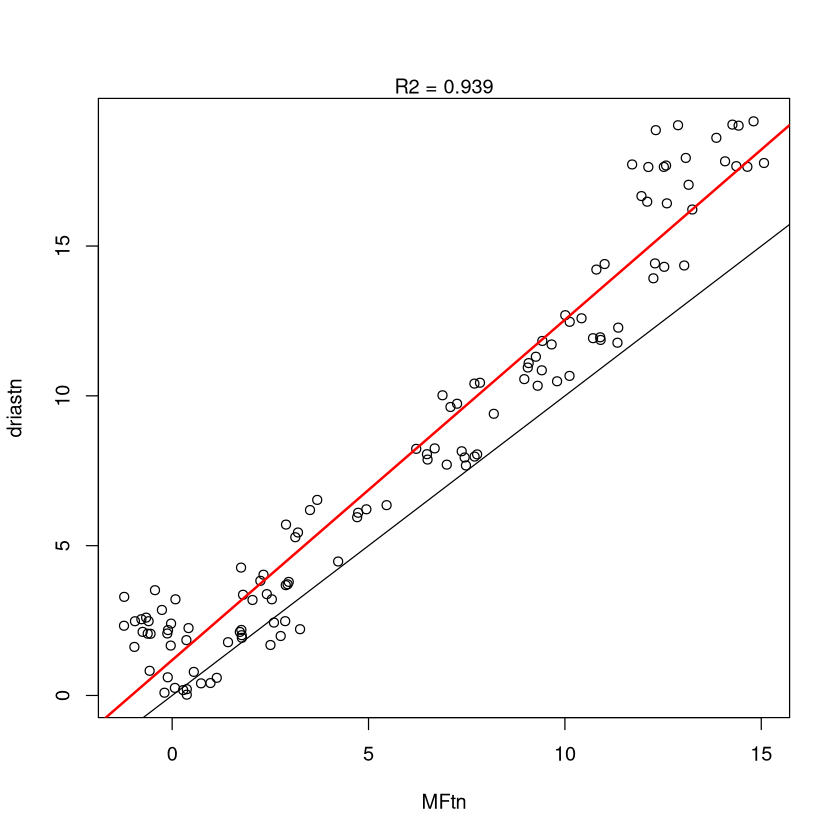

In [11]:
## Trace la graphique de comparaison station vs point de grille Drias
plot(MFtn,driastn)
## Trace la bissectrice (i.e. accord parfait)
abline(a=0, b = 1)
## Trace la droite de l'ajustement linéeaire
abline(lm(driastn~MFtn), col = "red", lwd=2)
## Calcul du coefficient de détermination et 
R2 <- cor(MFtn,driastn, use = "pairwise.complete.obs")^2
mtext(paste0("R2 = ", round(R2, 3)),side = 3)

lm(driastn~MFtn) ## Coeffcient de l'ajustement linéraire